# Bike Sharing Assignment

**Business Goal:**<br>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# 1. Data understanding

## 1.1  Importing required libraries


In [1]:
#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


## 1.2 Reading Data

- day.csv as `"bike"`

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1.3 Inspecting Dataframe

**1.3.1 Checking shape of the dataframe**

In [3]:
bike.shape

(730, 16)

**1.3.2 Checking descriptive information**

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**1.3.3 Checking statistical summary for the numeric columns**

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**1.3.4 Checking percentage of null values for each column**

In [6]:
bike.isnull().sum() /len(bike) *100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- ***There are no null columns in the dataset***

 # 2. Data Cleaning

In [7]:
#Checking dataframe again
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.1 create a new dataframe with required columns from "bike" dataframe and then proceed further
We have ignored **`"instant"`** beacuse it is an index column. Also ignored **`"dteday"`** becuse we have **`"yr"`**, **`"mnth"`** with same information. Also we have ignored columns **`"casual"`** and **`"registered"`** because **`"cnt"`** is sum of the both.
We have ignored some columns for now.

In [8]:
#Creating new dataframe with required columns
bike_new = bike[["season", "yr","mnth", "holiday", "weekday", "workingday", "weathersit","temp","atemp",
                 "hum","windspeed","cnt"]]

bike_new.head()    #Checking dataframe

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 2.2. Handling errors in Dataframe

You can observe in the dataset that some of the variables like **`'weathersit'`** and **`'season'`** have values as _1, 2, 3, 4 which have specific labels associated with them_ .So converting such feature values into categorical string values before proceeding with model building

**2.2.1 replacing values in `"season"` columns**


In [9]:
bike_new["season"].replace({1 : "spring", 2 : "summer" , 3 : "fall", 4 : "winter"} , inplace = True)

**2.2.2 replacing values in `"weathersit"` column**

In [10]:
bike_new["weathersit"].replace({1 : "Clear_PartlyCloudy", 2 : "Mist+Cloudy" , 3 : "LightSnow_LightRain+Thunderstorm",
                          4 : "HeavyRain_IcePallets_Thunderstorm_Mist"} , inplace = True)


**2.2.3 Replacing values in `"weekdays"` column**

In [11]:
bike_new['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
                            ,inplace=True)


**2.2.4 Replacing values in `"mnth"` columns**

In [12]:
bike_new['mnth'].replace({1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "June", 7 : "July", 8 : "Aug",
                         9 : "Sept", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                            ,inplace=True)

In [13]:
# Checking the dataframe
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


## 2.3. Chaging dtype of columns to appropriate data type 

In [14]:
#Checking dtypes of columns
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


**2.3.1 changing dtypes of following column to category to save memory usage**

In [15]:
bike[["season", "weekday", "weathersit", "weekday", "mnth"]] = bike[["season", "weekday", "weathersit", "weekday",
                                                                     "mnth"]].astype('category')

In [16]:
##Checking dtypes of all columns again
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    object  
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7), object(2)
memory usage: 77.1+ KB


## 2.4  Data quality checks 

- We will check value counts for every column .This will help us to check if there are any junk values

In [17]:
column = bike_new.columns    #creating list for all columns 

for col in column:
    print(bike_new[col].value_counts(), '\n')    #Running a for loop and applying value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

Dec     62
Jan     62
May     62
Oct     62
July    62
Mar     62
Aug     62
Nov     60
Sept    60
June    60
Apr     60
Feb     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

Monday       105
Tuesday      105
Saturday     104
Friday       104
Sunday       104
Wednesday    104
Thursday     104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 

Clear_PartlyCloudy                  463
Mist+Cloudy                         246
LightSnow_LightRain+Thunderstorm     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625 

- As we can see above, there are **no junk values** in dataframe so we can proceed further.

# 3. EDA

## 3.1 Pairplots for understanding Numeric variables

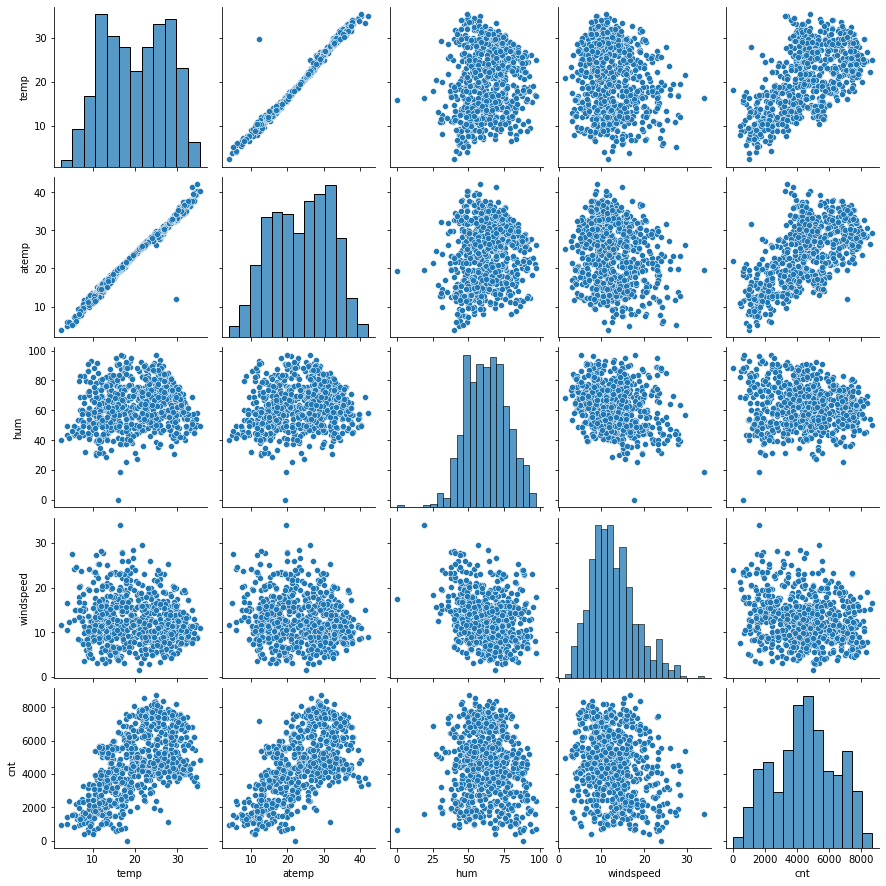

In [18]:
cols = bike_new[[ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]   #Saving required columns in the list

sns.pairplot(cols)   #plotting pairplots
plt.show()


## 3.2 Correlation Matrix

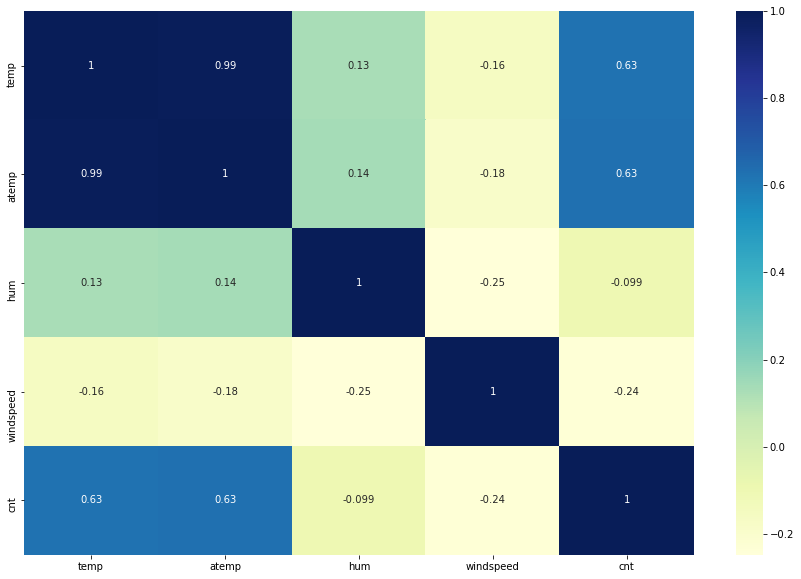

In [19]:
plt.figure(figsize = (15 , 10))

sns.heatmap( cols.corr() , annot = True, cmap="YlGnBu")    #Plotting heatmap
plt.show()

- Here we observ that **"temp" and "atemp"** columns are highly correlated .So it's better to drop one of them

In [20]:
#Let us drop temp and consider atemp

bike_new.drop(['temp'],axis=1,inplace=True)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist+Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist+Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,11.46350,43.6957,12.522300,1600


## 3.3 Visualising categorical variables by plotting Boxplots

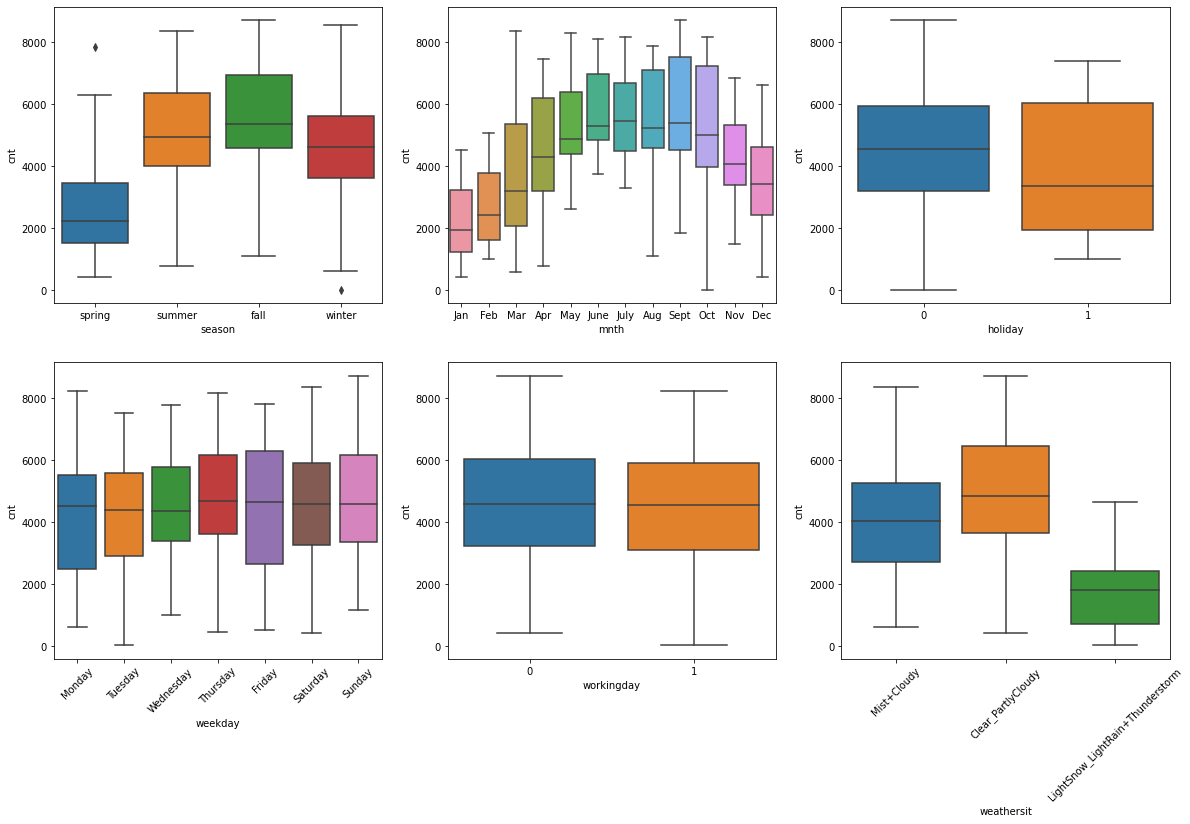

In [21]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)          #cnt Vs season

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)           #cnt Vs mnth

plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)        #cnt Vs holiday

plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)        #cnt Vs weekday
plt.xticks(rotation=45)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)     #cnt Vs workingday

plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)     #cnt Vs weathersit
plt.xticks(rotation=45)

plt.show()

**Inference :**<br>
- **cnt Vs mnth :** It is seen that most of the bookings were done in the months April to October.
- **cnt Vs weathersit :** It is seen that less bookings are done when there is light rain or thinderstorm.

## 3.4 Barplots for Categorical Variables

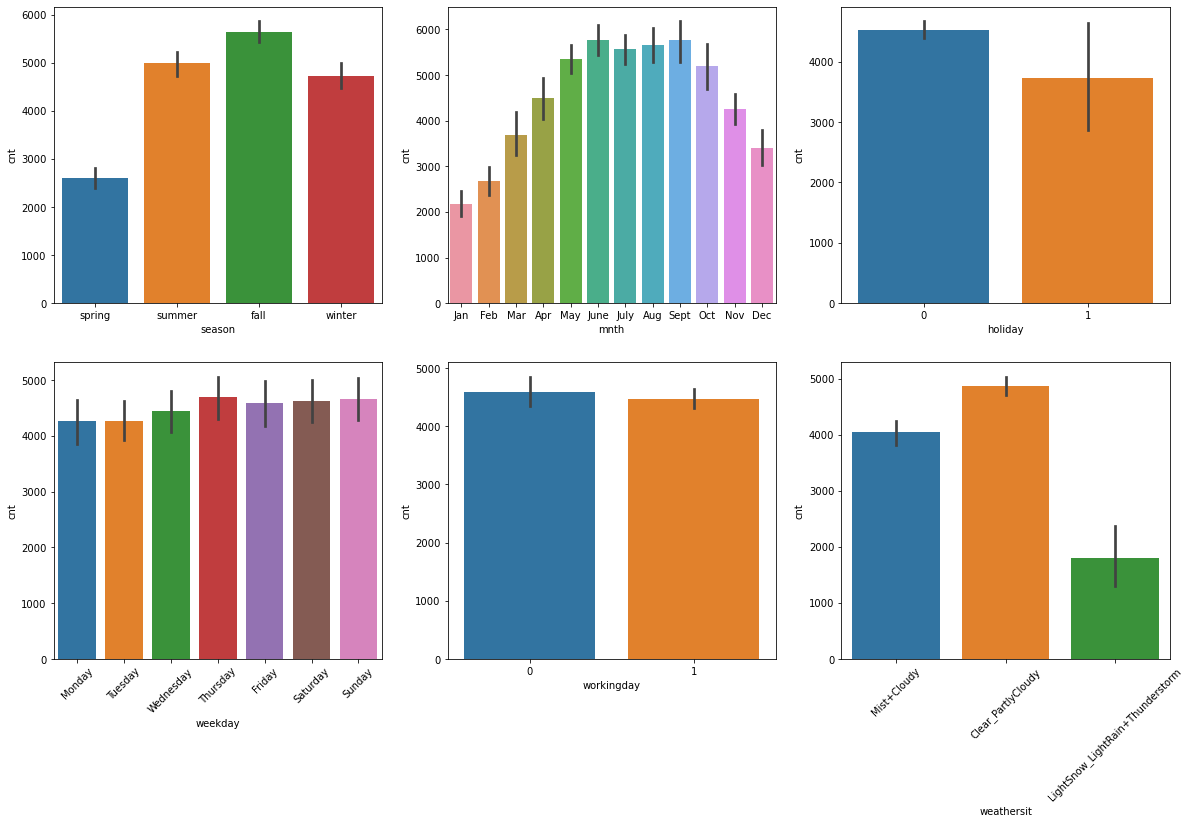

In [22]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_new)          #cnt Vs season

plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_new)           #cnt Vs mnth

plt.subplot(2,3,3)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_new)        #cnt Vs holiday

plt.subplot(2,3,4)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_new)        #cnt Vs weekday
plt.xticks(rotation=45)

plt.subplot(2,3,5)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_new)     #cnt Vs workingday

plt.subplot(2,3,6)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_new)     #cnt Vs weathersit
plt.xticks(rotation=45)

plt.show()

# 4. Creating dummy variables

In [23]:
bike_new = pd.get_dummies(bike_new, drop_first=True)

bike_new.head() 

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bike_new.info()     ## Checking info for better understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   yr                                           730 non-null    int64  
 1   holiday                                      730 non-null    int64  
 2   workingday                                   730 non-null    int64  
 3   atemp                                        730 non-null    float64
 4   hum                                          730 non-null    float64
 5   windspeed                                    730 non-null    float64
 6   cnt                                          730 non-null    int64  
 7   season_spring                                730 non-null    uint8  
 8   season_summer                                730 non-null    uint8  
 9   season_winter                                730 non-null    uint8  
 10  mn

# 5. Splitting the Data into Training and Testing Sets

In [25]:
# Importing required library for splitting the dataframe
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)


In [26]:
# Checking the train dataset
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
#Checking the shape of train dataset
bike_train.shape

(510, 29)

In [28]:
# Checking the test dataset
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
#Checking the shape of the test dataset
bike_test.shape

(219, 29)

# 6. Rescaling the features
**We'll use MinMax scaling**

In [30]:
from sklearn.preprocessing import MinMaxScaler   #importing required library

scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the '0/1' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']  #saving required columns in the list 

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])    #fit to data and then transform

bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# 7. Dividing train set into X and y sets for the model building

In [32]:
y_train = bike_train.pop("cnt") 
X_train = bike_train

In [33]:
#Checking the X_train dataset
X_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
#Checking y_train dataset
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# 8. Building the model

## 8.1 Using `RFE approach` for the feature selection 
**Recursive feature elimination:** We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [35]:
#importing required libraries 
from sklearn.feature_selection import RFE


In [36]:
#Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train , y_train)

rfe = RFE(lr , 15)   #Running RFE
rfe = rfe.fit(X_train , y_train)

In [37]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', False, 10),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_LightSnow_LightRain+Thunderstorm', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [38]:
# Creating a list for RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnow_LightRain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [39]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## 8.2 Building model using statsmodel, for the detailed statistics

In [40]:
#Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

## Model 1

In [41]:
#Adding a constant variable
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running the linear model
lr1 = sm.OLS(y_train , X_train_rfe1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.26e-186
Time:                        20:21:37   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

- **Checking VIF for the new model**

In [42]:
#importing required library for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe
vif = pd.DataFrame()  

# saving dataframe to new variable
X = X_train_rfe               

vif['Features'] = X.columns         #Adding columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]   #Calculating VIF
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,season_winter,3.04
5,season_summer,2.28
14,weathersit_Mist+Cloudy,2.24
0,yr,2.06
10,mnth_Jan,1.92
11,mnth_Nov,1.85
8,mnth_Dec,1.63


- Here we have high VIF value for **`"hum"`** ,So we'll drop column "hum"

In [43]:
# Dropping "hum" column
X_train_rfe.drop(["hum"] , axis = 1 , inplace = True)

## Model 2

In [44]:
#Adding a constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe)

#Running the linear model
lr2 = sm.OLS(y_train , X_train_rfe2).fit()

#Let's see the summary of our linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.00e-184
Time:                        20:21:38   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

- **Checking VIF for the new model**

In [45]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_winter,2.62
0,yr,2.06
4,season_summer,2.04
10,mnth_Nov,1.81
6,mnth_Aug,1.59
13,weathersit_Mist+Cloudy,1.57
7,mnth_Dec,1.41
11,mnth_Sept,1.35


- Dropping **`"windspeed"`** column as it have high VIF value after **`"atemp"`**. We do not drop "atemp" as it seems somewhat important.

In [46]:
#Dropping "windspeed" column
X_train_rfe.drop(["windspeed"] , axis = 1, inplace = True)

## Model 3

- Let's see model significance after dropping "windspeed".

In [47]:
#Adding a constant variable
X_train_rfe3= sm.add_constant(X_train_rfe)

In [48]:
#Running the linear model
lr3 = sm.OLS(y_train , X_train_rfe3).fit()

In [49]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.75e-178
Time:                        20:21:39   Log-Likelihood:                 482.49
No. Observations:                 510   AIC:                            -937.0
Df Residuals:                     496   BIC:                            -877.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

- **Checking VIF values for new model.**

In [50]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
4,season_winter,2.60
0,yr,2.04
3,season_summer,1.91
9,mnth_Nov,1.77
5,mnth_Aug,1.59
12,weathersit_Mist+Cloudy,1.56
6,mnth_Dec,1.37
10,mnth_Sept,1.35
8,mnth_Jan,1.15


- All the VIF values and p-values are significant as of now

- We'll drop **`"mnth_Nov"`** as it have quite higher p-value than others.

In [51]:
#Dropping "mnth_Nov"
X_train_rfe.drop(['mnth_Nov'], axis=1 , inplace = True)

- ### Now we will add columns one by one and check for the model significance

## Model 4

- Adding new column **`"workingday"`** and see how it impacts the model

In [52]:
#Adding "workingday" column
X_train_rfe["workingday"] = X_train["workingday"]

In [53]:
#Adding a constant variable
X_train_rfe4 = sm.add_constant(X_train_rfe)

#Running the linear model
lr4 = sm.OLS(y_train , X_train_rfe4).fit()

#print summary of linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.62e-178
Time:                        20:21:39   Log-Likelihood:                 483.30
No. Observations:                 510   AIC:                            -938.6
Df Residuals:                     496   BIC:                            -879.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [54]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,5.16
12,workingday,3.40
0,yr,2.04
3,season_summer,1.98
4,season_winter,1.86
5,mnth_Aug,1.59
11,weathersit_Mist+Cloudy,1.56
9,mnth_Sept,1.33
8,mnth_Jan,1.27
6,mnth_Dec,1.23


- Adding **`"workingday"`** doesn't have much impact on the model significance. And it increased p-value and VIF value for some of the variables. Hence we'll drop it.

In [55]:
#Dropping "workingday" column
X_train_rfe.drop(["workingday"], axis =1 ,inplace = True)

## Model 5

- Adding new column **`"weekday_Saturday"`** and see how it impacts the model

In [56]:
##Adding "weekday_Saturday" column
X_train_rfe['weekday_Saturday'] = X_train['weekday_Saturday']

In [57]:
#Adding a constant variable
X_train_rfe5 = sm.add_constant(X_train_rfe)

#Running the linear model
lr5 = sm.OLS(y_train , X_train_rfe5).fit()

#Print the summary of linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.24e-177
Time:                        20:21:40   Log-Likelihood:                 481.08
No. Observations:                 510   AIC:                            -934.2
Df Residuals:                     496   BIC:                            -874.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [58]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.05
0,yr,2.04
3,season_summer,1.92
4,season_winter,1.73
5,mnth_Aug,1.59
11,weathersit_Mist+Cloudy,1.56
9,mnth_Sept,1.33
6,mnth_Dec,1.22
8,mnth_Jan,1.16
12,weekday_Saturday,1.15


- Adding **`"weekday_Saturday"`** doesn't have much impact on the model significance.Also it increases p-value of some of the columns which is not acceptable. Hence we'll drop it

In [59]:
#Dropping the column "weekday_Saturday"
X_train_rfe.drop(["weekday_Saturday"], axis=1, inplace = True)

## Model 6

- Adding new column **`"weekday_Sunday"`** and see how it impacts the model

In [60]:
##Adding "weekday_Sunday" column
X_train_rfe['weekday_Sunday'] = X_train['weekday_Sunday']

In [61]:
#Adding a constant variable
X_train_rfe6 = sm.add_constant(X_train_rfe)

#Running the linear model
lr6 = sm.OLS(y_train , X_train_rfe6).fit()

#Print the summary of linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.34e-177
Time:                        20:21:41   Log-Likelihood:                 481.61
No. Observations:                 510   AIC:                            -935.2
Df Residuals:                     496   BIC:                            -875.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [62]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.06
0,yr,2.04
3,season_summer,1.91
4,season_winter,1.73
5,mnth_Aug,1.59
11,weathersit_Mist+Cloudy,1.57
9,mnth_Sept,1.33
6,mnth_Dec,1.23
12,weekday_Sunday,1.17
8,mnth_Jan,1.16


- Adding **`"weekday_Sunday"`** doesn't have much impact on the model significance. Also it increases p-value for some variables which is not acceptable. Hence we'll drop it

In [63]:
##Dropping the column
X_train_rfe.drop(["weekday_Sunday"], axis=1, inplace = True)

### Model 7

- Adding **`"season_spring"`** and see how it impacts the model.

In [64]:
##Adding 'season_spring' column
X_train_rfe['season_spring'] = X_train['season_spring']

In [65]:
#Adding a constant variable
X_train_rfe7 = sm.add_constant(X_train_rfe)

#Running the linear model
lr7 = sm.OLS(y_train , X_train_rfe7).fit()

#Print the summary of linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.72e-178
Time:                        20:21:42   Log-Likelihood:                 482.18
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     496   BIC:                            -877.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [66]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.31
12,season_spring,3.66
8,mnth_Jan,2.18
3,season_summer,2.08
0,yr,2.07
4,season_winter,1.95
7,mnth_Feb,1.86
5,mnth_Aug,1.69
11,weathersit_Mist+Cloudy,1.59
9,mnth_Sept,1.37


- Adding **`"season_spring"`** doesn't have much impact model significane. Also it increases p-value for some variables which is not acceptable. Hence we'll drop it

In [67]:
#Dropping "season_winter" column
X_train_rfe.drop(["season_spring"], axis = 1, inplace = True)

## Model 8

- After dropping **`"season_spring"`**, let's see the impact on the model significance.

In [68]:
#Adding a constant variable
X_train_rfe8 = sm.add_constant(X_train_rfe)

#Running the linear model
lr8 = sm.OLS(y_train , X_train_rfe8).fit()

#print the summary of linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.98e-178
Time:                        20:21:42   Log-Likelihood:                 480.13
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                     497   BIC:                            -879.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [69]:
#Checking VIF values
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
0,yr,2.04
3,season_summer,1.91
4,season_winter,1.73
5,mnth_Aug,1.59
11,weathersit_Mist+Cloudy,1.56
9,mnth_Sept,1.33
6,mnth_Dec,1.22
8,mnth_Jan,1.15
7,mnth_Feb,1.11


- Still significance is similiar as previous model (model 7). But it still have high p-value for some variables.So we'll drop the variable with high p-value i.e. **`"mnth_Dec"`**

In [70]:
#Dropping the "mnth_Feb" column
X_train_rfe.drop(["mnth_Dec"], axis = 1, inplace = True)

## Model 9

- Let's see model significance after dropping the **`"mnth_Dec"`** column.

In [71]:
#Adding a constant variable
X_train_rfe9 = sm.add_constant(X_train_rfe)

#Running the linear model
lr9 = sm.OLS(y_train , X_train_rfe9).fit()

#print the summary of linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.06e-178
Time:                        20:21:43   Log-Likelihood:                 478.71
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     498   BIC:                            -882.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [72]:
#Checking VIF values
vif = pd.DataFrame()
X = X_train_rfe

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
0,yr,2.03
3,season_summer,1.91
5,mnth_Aug,1.59
4,season_winter,1.58
10,weathersit_Mist+Cloudy,1.55
8,mnth_Sept,1.32
7,mnth_Jan,1.15
6,mnth_Feb,1.11
9,weathersit_LightSnow_LightRain+Thunderstorm,1.06


- Still significance is similiar as previous model (model 7). But it still have high p-value for some variables.So we'll drop the variable with high p-value i.e. **`"mnth_Feb"`**

In [73]:
X_train_rfe.drop(["mnth_Feb"], axis=1, inplace = True)

## Model 10

- After dropping `"mnth_Feb"`, let's see how it impacts the model.

In [74]:
#Adding a constant variable
X_train_rfe10 = sm.add_constant(X_train_rfe)

#Running the linear model
lr10 = sm.OLS(y_train , X_train_rfe10).fit()

#print the summary of linear model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.35e-179
Time:                        20:21:43   Log-Likelihood:                 477.44
No. Observations:                 510   AIC:                            -932.9
Df Residuals:                     499   BIC:                            -886.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [75]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.92
0,yr,2.00
3,season_summer,1.84
5,mnth_Aug,1.55
4,season_winter,1.53
9,weathersit_Mist+Cloudy,1.52
7,mnth_Sept,1.30
6,mnth_Jan,1.14
8,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Still it have high p-value for the **`"mnth_Jan"`**. So we'll drop it.

In [76]:
#Dropping the column "mnth_Jan"
X_train_rfe.drop(['mnth_Jan'], axis = 1, inplace=True)

## Model 11

- Let's see how it impacts model significance after dropping **`"mnth_Jan"`**.

In [77]:
#Adding a constant variable
X_train_rfe11 = sm.add_constant(X_train_rfe)

#Running the linear model
lr11 = sm.OLS(y_train , X_train_rfe11).fit()

#print the summary of linear model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.93e-180
Time:                        20:21:45   Log-Likelihood:                 475.83
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     500   BIC:                            -889.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [78]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.91
0,yr,1.93
3,season_summer,1.79
5,mnth_Aug,1.53
4,season_winter,1.48
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.28
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- After removing **`"mnth_Jan"`** have similiar model significance like previous models. **But p-values and VIF values are good enough.**

### Now again adding  variables and see if model significance increases or not.

## Model 12

- Adding **`"mnth_May"`** and see how it impacts model significance.

In [79]:
## Adding "mnth_May"
X_train_rfe['mnth_May'] = X_train['mnth_May']

In [80]:
#Adding a constant variable
X_train_rfe12 = sm.add_constant(X_train_rfe)

#Running the linear model
lr12 = sm.OLS(y_train , X_train_rfe12).fit()

#print the summary of linear model obtained
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.79e-179
Time:                        20:21:46   Log-Likelihood:                 476.21
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     499   BIC:                            -883.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [81]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.95
3,season_summer,2.23
0,yr,1.95
9,mnth_May,1.55
5,mnth_Aug,1.53
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"mnth_May"`** increases p-value for itself only which is not acceptable, hence we'll drop it.

In [82]:
#Dropping the column "weekday_Tuesday"
X_train_rfe.drop(['mnth_May'], axis = 1, inplace=True)

## Model 13

- Adding **`"mnth_June"`** and see how it impacts on model significance.

In [83]:
## Adding "mnth_June"
X_train_rfe['mnth_June'] = X_train['mnth_June']

In [84]:
#Adding a constant variable
X_train_rfe13 = sm.add_constant(X_train_rfe)

#Running the linear model
lr13 = sm.OLS(y_train , X_train_rfe13).fit()

#print the summary of linear model obtained
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.63e-179
Time:                        20:21:46   Log-Likelihood:                 476.23
No. Observations:                 510   AIC:                            -930.5
Df Residuals:                     499   BIC:                            -883.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [85]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.47
0,yr,1.94
3,season_summer,1.80
5,mnth_Aug,1.60
4,season_winter,1.52
8,weathersit_Mist+Cloudy,1.46
6,mnth_Sept,1.32
9,mnth_June,1.32
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"mnth_June"`** doesn't have much impact on the model significance. But it increases p-value for itself and VIF value for "atemp" which is not acceptable, hence we'll drop it.

In [86]:
#Dropping the column "weekday_Monday"
X_train_rfe.drop(['mnth_June'], axis = 1, inplace=True)

## Model 14

- Adding **`"weekday_Tuesday"`** column and see how it impacts on model significance.

In [87]:
## Adding "weekday_Tuesday"
X_train_rfe['weekday_Tuesday'] = X_train['weekday_Tuesday']

In [88]:
#Adding a constant variable
X_train_rfe14 = sm.add_constant(X_train_rfe)

#Running the linear model
lr14 = sm.OLS(y_train , X_train_rfe14).fit()

#print the summary of linear model obtained
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.05e-180
Time:                        20:21:47   Log-Likelihood:                 479.02
No. Observations:                 510   AIC:                            -936.0
Df Residuals:                     499   BIC:                            -889.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [89]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.04
0,yr,1.94
3,season_summer,1.79
5,mnth_Aug,1.54
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
9,weekday_Tuesday,1.18
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"weekday_Tuesday"`** doesn't have much impact on the model significane.But increases p-value and VIF value.Hence we'll drop it.

In [90]:
#Dropping the column "weekday_Tuesday"
X_train_rfe.drop(['weekday_Tuesday'], axis = 1, inplace=True)

## Model 15

- Adding **`"weekday_Monday"`** and see how it impacts the model

In [91]:
## Adding "weekday_Monday"
X_train_rfe['weekday_Monday'] = X_train['weekday_Monday']

In [92]:
#Adding a constant variable
X_train_rfe15 = sm.add_constant(X_train_rfe)

#Running the linear model
lr15 = sm.OLS(y_train , X_train_rfe15).fit()

#print the summary of linear regression model built
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.46e-179
Time:                        20:21:48   Log-Likelihood:                 477.93
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     499   BIC:                            -887.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [93]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.02
0,yr,1.94
3,season_summer,1.79
5,mnth_Aug,1.53
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
9,weekday_Monday,1.15
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"weekday_Monday"`** doesn't have much effect on  model significance .

In [94]:
#Dropping the column
X_train_rfe.drop(['weekday_Monday'], axis = 1, inplace=True)

## Model 16

- Adding **`"mnth_July"`** and see how it impacts the model significance.

In [95]:
## Adding "mnth_July"
X_train_rfe['mnth_July'] = X_train['mnth_July']

In [96]:
#Adding a constant variable
X_train_rfe16 = sm.add_constant(X_train_rfe)

#Running the linear model
lr16 = sm.OLS(y_train , X_train_rfe16).fit()

#print the summary of linear regression model obtained
print(lr16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.09e-178
Time:                        20:21:49   Log-Likelihood:                 475.87
No. Observations:                 510   AIC:                            -929.7
Df Residuals:                     499   BIC:                            -883.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [97]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,7.28
3,season_summer,2.50
5,mnth_Aug,2.03
9,mnth_July,2.00
0,yr,1.95
4,season_winter,1.81
6,mnth_Sept,1.53
8,weathersit_Mist+Cloudy,1.45
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"mnth_July"`** doesn't have any effect on model significance .But increases p-value and VIF value.Hence we'll drop it.

In [98]:
#Dropping "mnth_July"
X_train_rfe.drop(['mnth_July'], axis = 1, inplace=True)

## Model 17

- Adding **`"weekday_Wednesday"`** and see how it impacts the model significance.

In [99]:
## Adding "weekday_Wednesday"
X_train_rfe['weekday_Wednesday'] = X_train['weekday_Wednesday']

In [100]:
#Adding a constant variable
X_train_rfe17 = sm.add_constant(X_train_rfe)

#Running the linear model
lr17 = sm.OLS(y_train , X_train_rfe17).fit()

#Print the summary of linear regression model obtained
print(lr17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.13e-178
Time:                        20:21:50   Log-Likelihood:                 475.83
No. Observations:                 510   AIC:                            -929.7
Df Residuals:                     499   BIC:                            -883.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [101]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.94
0,yr,1.94
3,season_summer,1.79
5,mnth_Aug,1.53
4,season_winter,1.50
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
9,weekday_Wednesday,1.19
1,holiday,1.07
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06


- Adding **"weekday_Wednesday"** doesn't have much impact on model significance.But increases p-value. Hence we'll drop it.

In [102]:
#Dropping "weekday_Wednesday"
X_train_rfe.drop(['weekday_Wednesday'], axis = 1, inplace=True)

## Model 18

- Adding **`"mnth_Oct"`** and see how it impacts the model

In [103]:
## Adding "mnth_Oct"
X_train_rfe['mnth_Oct'] = X_train['mnth_Oct']

In [104]:
#Adding a constant variable
X_train_rfe18 = sm.add_constant(X_train_rfe)

#Running the linear model
lr18 = sm.OLS(y_train , X_train_rfe18).fit()

#Print the summary of linear regression model obtained
print(lr18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.10e-179
Time:                        20:21:51   Log-Likelihood:                 477.15
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     499   BIC:                            -885.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [105]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.99
0,yr,1.94
4,season_winter,1.93
3,season_summer,1.81
9,mnth_Oct,1.60
5,mnth_Aug,1.54
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.31
7,weathersit_LightSnow_LightRain+Thunderstorm,1.07
1,holiday,1.03


- Adding **`"mnth_Oct"`** increases p-value,Hence we'll drop it.

In [106]:
#Dropping "mnth_Oct"
X_train_rfe.drop(['mnth_Oct'], axis = 1, inplace = True)

## Model 19

- Adding **`"weekday_Thursday"`** and see how it impacts model significance.

In [107]:
## Adding "weekday_Thursday"
X_train_rfe['weekday_Thursday'] = X_train['weekday_Thursday']

In [108]:
#Adding a constant variable
X_train_rfe19 = sm.add_constant(X_train_rfe)

#Running the linear model
lr19 = sm.OLS(y_train , X_train_rfe19).fit()

#Print the summary of linear regression model obtained
print(lr19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.75e-179
Time:                        20:21:51   Log-Likelihood:                 476.52
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     499   BIC:                            -884.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [109]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.05
0,yr,1.94
3,season_summer,1.80
5,mnth_Aug,1.53
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.28
9,weekday_Thursday,1.18
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"weekday_thursday"`** increases p-value. Hence we'll drop it.

In [110]:
#Dropping "weekday_Thursday"
X_train_rfe.drop(['weekday_Thursday'], axis = 1, inplace = True)

## Model 20 

- Adding **`"mnth_Mar"`** and see how it impacts the model significance.

In [111]:
## Adding "mnth_Mar"
X_train_rfe['mnth_Mar'] = X_train['mnth_Mar']

In [112]:
#Adding a constant variable
X_train_rfe20 = sm.add_constant(X_train_rfe)

#Running the linear model
lr20 = sm.OLS(y_train , X_train_rfe20).fit()

#Print the summary of linear regression model obtained
print(lr20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.98e-179
Time:                        20:21:52   Log-Likelihood:                 476.48
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     499   BIC:                            -884.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [113]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.96
0,yr,1.95
3,season_summer,1.79
5,mnth_Aug,1.55
4,season_winter,1.51
8,weathersit_Mist+Cloudy,1.45
6,mnth_Sept,1.30
9,mnth_Mar,1.12
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding **`"mnth_Mar"`** increases p-value. Hence we'll drop it.

In [114]:
X_train_rfe.drop(["mnth_Mar"], axis = 1, inplace = True)

- ### We have considered all columns and checked for Model Significance.Now we stop the model building and check on which model can we choose.

### Out of all models,  <font color = 'red'> model 11 (lr11) </font> seems to give good result so we choose it as it have a good R-squared and F-static value.

## 8.3 Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_pred = lr11.predict(X_train_rfe11)

Text(0.5, 0, 'Errors')

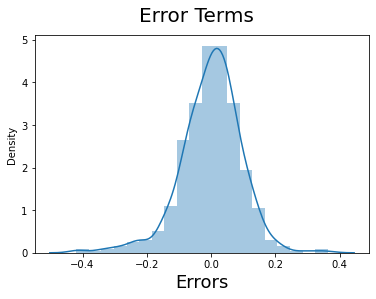

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- From the above histogram, we could see that the **Residuals are normally distributed**. Hence our assumption for Linear Regression is valid.

# 9. Making Predictions using the final model

## 9.1 Applying scaling to test datasets

In [117]:
# Apply scaler() to all the columns except the '0/1' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])   #Transform the data 

bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## 9.2 Dividing test dataset into X and y datasets

In [118]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [119]:
# dropping "const" column from the data set
X_train_new = X_train_rfe11.drop(['const'], axis=1) 

- We'll use __model 11 (lr11)__ for predicting the values

In [120]:
# Lets use our model to make predictions

#creating new dataframe X_test_1 by dropping variables from X_test
X_test_1 = X_test[ X_train_new.columns ]

#Adding a constant variable
X_test_1 = sm.add_constant(X_test_1)

#### Making predictions

In [121]:
y_pred = lr11.predict(X_test_1)      # Making Predictions

## 9.3 Model Evaluation
Let's now plot the graph for actual versus predicted values.

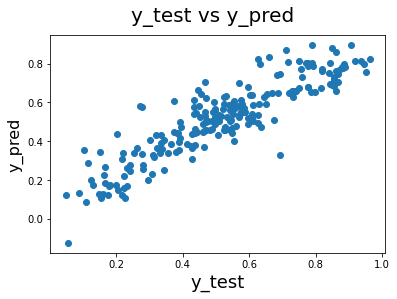

In [122]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

- We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

- **Again checking for error terms**

Text(0, 0.5, 'Views_show-Predicted_views')

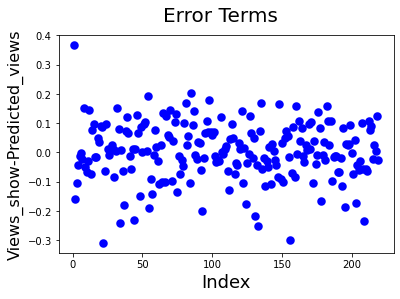

In [123]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.scatter(c, y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

- There is no pattern in error terms.Error terms are **approximately normally distributed with mean zero.**

### Again printing the summary for selected best model

In [124]:
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.93e-180
Time:                        20:21:59   Log-Likelihood:                 475.83
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     500   BIC:                            -889.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [125]:
#importing required library to calculate MSE
from sklearn.metrics import mean_squared_error

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09809580740734068

In [126]:
#Calculate the r square for test

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)



0.7973971218586231

.

 We can see that the Equation for best fit line is :<br>
 ### cnt   =   (0.2322 x yr) -  (0.096 x holiday) + (0.56 x atemp) + (0.093 x season_summer) + (0.139 x season_winter ) +  (0.071 x mnth_Aug) + (0.126 x mnth_Sept) - (0.289 x weathersit_LightSnow_LightRain+Thunderstorm) - (0.089 x weathersit_Mist+Cloudy) -  (0.082 x weathersit_Mist+Cloudy )

We can see that bike sharing demand depends on following variables:<br>
**"yr","holiday", "atemp", "season_summer", "season_winter","mnth_Aug", "mnth_Sept", "weathersit_LightSnow_LightRain+Thunderstorm ", "weathersit_Mist+Cloudy"**<br>


**temp :** A coefficient value of ‘0.5608’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5608 units.<br>
**weathersit_LightSnow_LightRain+Thunderstorm :** A coefficient value of ‘-0.2894’ indicated that a unit decrease in "weathersit_LightSnow_LightRain+Thunderstorm" variable, decreases the bike hire numbers by -0.2894 units.<br>
**yr:** A coefficient value of ‘0.2322’ indicated that a unit increases in yr variable, increases the bike hire numbers by 0.2322 units.<br>

R-squared for train set = 82.0 <br>
R-squared for test set = 79.7 <br>
